# Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [5]:
startup= pd.read_csv('50_Startups.csv')
startup.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [7]:
startup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
startup.count()

R&D Spend          50
Administration     50
Marketing Spend    50
State              50
Profit             50
dtype: int64

In [9]:
startup.shape

(50, 5)

In [10]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [11]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [12]:
startup=startup.rename(columns={'R&D Spend':'RD','Administration':'Ad','Marketing Spend':'MS','State':'St','Profit':'Pro'}) 
startup.head(2)

,RD,Ad,MS,St,Pro
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [13]:
startup.describe()

,RD,Ad,MS,Pro
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [14]:
startup.corr()

,RD,Ad,MS,Pro
RD,1.000000,0.241955,0.724248,0.972900
Ad,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Pro,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

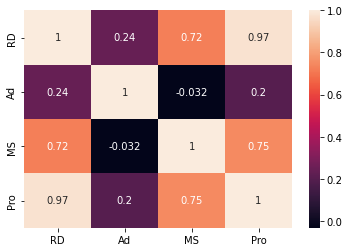

In [15]:
sns.heatmap(startup.corr(), annot=True)

In [16]:
state=pd.get_dummies(startup['St'],drop_first=True)
state.head(2)

,Florida,New York
0,0,1
1,0,0


In [17]:
startup1=startup.drop('St',axis=1)
startup1.head()

,RD,Ad,MS,Pro
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [19]:
startup1=pd.concat([startup1,state],axis=1)
startup1.head()

,RD,Ad,MS,Pro,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [20]:
startup1.columns

Index(['RD', 'Ad', 'MS', 'Pro', 'Florida', 'New York'], dtype='object')

In [22]:
X = startup1[['RD','Ad', 'MS', 'Florida', 'New York']]
Y = startup1[['Pro']]

In [23]:
model = sm.OLS(Y, X).fit()

In [24]:
predictions = model.predict(X)

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    Pro   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              727.1
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                    7.87e-42
Time:                        14:34:03   Log-Likelihood:                         -545.15
No. Observations:                  50   AIC:                                      1100.
Df Residuals:                      45   BIC:                                      1110.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD             0.7182      0.066     10.916      0.000       0.586       0.851
Ad             0.3113      0.035      8.885      0.000       0.241       0.382
MS             0.0786      0.023      3.429      0.001       0.032       0.125
Florida     3464.4536   4905.406      0.706      0.484   -6415.541    1.33e+04
New York    5067.8937   4668.238      1.086      0.283   -4334.419    1.45e+04
==============================================================================
Omnibus:                        1.355   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.241
Skew:                          -0.237   Prob(JB):                        0.538
Kurtosis:                       2.391   Cond. No.                     8.28e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### MODEL IS ACCEPTED.

BUT, THIERE IS STROGN MULTICOLLINEARITY IN THE DATASET.

## Solving Multicollinearity

# Finding Cook's Distance

In [27]:
model1 = model.get_influence()

In [29]:
summ_startup = model1.summary_frame()

In [30]:
summ_startup.sort_values('cooks_d', ascending=False)

,dfb_RD,dfb_Ad,dfb_MS,dfb_Florida,dfb_New York,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
38,-0.428253,-0.094846,0.401840,0.081835,0.531180,1.016685e-01,2.030302,0.109782,0.712982,2.106409,0.739708
46,0.600516,-0.148651,-0.501046,-0.187432,-0.004185,9.699214e-02,-1.195317,0.253409,-0.696391,-1.201184,-0.699809
14,-0.305378,-0.042969,0.281518,-0.331579,0.083333,7.490783e-02,-1.956952,0.089087,-0.611996,-2.023085,-0.632678
45,-0.192848,0.302302,-0.129547,0.095586,0.360216,7.095900e-02,1.570095,0.125814,0.595647,1.596909,0.605819
49,0.327651,-0.589181,-0.073229,0.242247,0.259380,6.963111e-02,-1.909335,0.087176,-0.590047,-1.969461,-0.608628
27,0.331255,0.015528,-0.416440,0.109031,-0.233535,6.419036e-02,-1.496481,0.125352,-0.566526,-1.518014,-0.574678
21,0.228409,-0.098383,-0.237101,0.112225,-0.217295,4.776374e-02,-1.618154,0.083584,-0.488691,-1.648761,-0.497934
11,0.175180,0.016564,0.060267,-0.273707,-0.263983,4.002932e-02,1.768777,0.060127,0.447377,1.813178,0.458608
2,0.196175,-0.242504,0.022821,0.177008,-0.012474,3.675173e-02,1.075957,0.136986,0.428671,1.077890,0.429441
28,-0.037226,-0.236493,0.209315,-0.197878,0.044681,3.421525e-02,-1.064671,0.131133,-0.413614,-1.066291,-0.414243


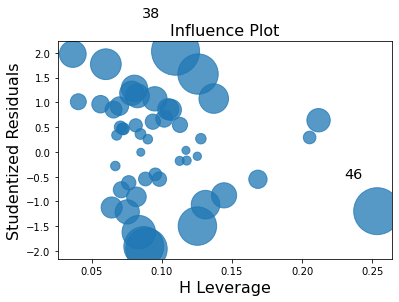

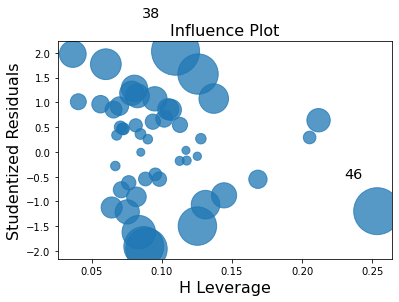

In [32]:
model1.plot_influence()

Index 38 and 46 has highest Cook's therefore we drop this row from the data set

### Variance Inflation Factor (VIF)

In [33]:
vif = pd.DataFrame()

In [34]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [35]:
vif["features"] = X.columns

In [36]:
vif.round(1)

,VIF Factor,features
0,8.5,RD
1,5.0,Ad
2,8.1,MS
3,2.0,Florida
4,1.9,New York


New York has the lowest variance inflation foctor, therefore drop this
variables to improve the model and solve multicolinearity.

In [39]:
# Removed administration fron the dataframe and Test the model
new_X = startup1[['RD', 'MS', 'Ad', 'Florida']]

In [40]:
new_model = sm.OLS(Y, new_X).fit()
new_predictions = new_model.predict(new_X)

In [41]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    Pro   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              905.1
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                    4.37e-43
Time:                        15:07:38   Log-Likelihood:                         -545.79
No. Observations:                  50   AIC:                                      1100.
Df Residuals:                      46   BIC:                                      1107.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD             0.7192      0.066     10.911      0.000       0.586       0.852
MS             0.0811      0.023      3.549      0.001       0.035       0.127
Ad             0.3265      0.032     10.149      0.000       0.262       0.391
Florida      910.7839   4312.966      0.211      0.834   -7770.767    9592.335
==============================================================================
Omnibus:                        0.539   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.764   Jarque-Bera (JB):                0.667
Skew:                          -0.122   Prob(JB):                        0.716
Kurtosis:                       2.489   Cond. No.                     6.12e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After droping "New York" from variables from the model, all
the variables are significant.


# Final Model

In [43]:
# Removed Index with highest Cook's distance to remove the hightest influencial ROW
new_df = startup1.drop(startup1.index[[38,46]])

In [46]:
new_X = new_df[['RD', 'MS', 'Ad','Florida']]
new_Y = new_df[['Pro']]

In [47]:
final_model = sm.OLS(new_Y, new_X).fit()
predictions = final_model.predict(new_X)

In [48]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    Pro   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              981.9
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                    2.17e-42
Time:                        15:12:40   Log-Likelihood:                         -521.65
No. Observations:                  48   AIC:                                      1051.
Df Residuals:                      44   BIC:                                      1059.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD             0.7144      0.072      9.917      0.000       0.569       0.860
MS             0.0801      0.024      3.297      0.002       0.031       0.129
Ad             0.3267      0.031     10.512      0.000       0.264       0.389
Florida     2478.6933   4191.342      0.591      0.557   -5968.402    1.09e+04
==============================================================================
Omnibus:                        0.951   Durbin-Watson:                   1.419
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                1.016
Skew:                          -0.286   Prob(JB):                        0.602
Kurtosis:                       2.576   Cond. No.                     6.12e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Square Root Transformation on X variable

In [50]:
X_sqrt = np.sqrt(new_df[['RD', 'MS', 'New York', 'Florida']])

In [51]:
model3 = sm.OLS(new_Y, X_sqrt).fit()
predictions3 = model3.predict(X_sqrt)

In [52]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    Pro   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              864.4
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                    3.46e-41
Time:                        19:56:43   Log-Likelihood:                         -524.67
No. Observations:                  48   AIC:                                      1057.
Df Residuals:                      44   BIC:                                      1065.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD           386.6004     30.734     12.579      0.000     324.660     448.540
MS            24.6841     17.824      1.385      0.173     -11.237      60.605
New York    5488.4591   4740.545      1.158      0.253   -4065.481     1.5e+04
Florida      889.8188   5061.626      0.176      0.861   -9311.218    1.11e+04
==============================================================================
Omnibus:                       16.099   Durbin-Watson:                   0.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.002
Skew:                           1.184   Prob(JB):                     4.54e-05
Kurtosis:                       5.097   Cond. No.                     1.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Square Root Transformation on Y variable

In [54]:
Y_sqrt = np.sqrt(new_df['Pro'])

In [57]:
model4 = sm.OLS(Y_sqrt, new_X).fit()
predictions4 = model4.predict(new_X)
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    Pro   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              549.2
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                    6.33e-37
Time:                        20:06:37   Log-Likelihood:                         -253.23
No. Observations:                  48   AIC:                                      514.5
Df Residuals:                      44   BIC:                                      521.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD             0.0008      0.000      3.118      0.003       0.000       0.001
MS             0.0003   9.06e-05      3.129      0.003       0.000       0.000
Ad             0.0016      0.000     13.811      0.000       0.001       0.002
Florida       12.0832     15.622      0.773      0.443     -19.401      43.568
==============================================================================
Omnibus:                        0.225   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.893   Jarque-Bera (JB):                0.334
Skew:                           0.148   Prob(JB):                        0.846
Kurtosis:                       2.719   Cond. No.                     6.12e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Square Root Transformation on X & Y variables.

In [58]:
model5 = sm.OLS(Y_sqrt, X_sqrt).fit()
predictions5 = model5.predict(X_sqrt)
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    Pro   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              331.2
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                    3.19e-32
Time:                        20:07:54   Log-Likelihood:                         -265.05
No. Observations:                  48   AIC:                                      538.1
Df Residuals:                      44   BIC:                                      545.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD             0.8567      0.138      6.225      0.000       0.579       1.134
MS             0.1583      0.080      1.983      0.054      -0.003       0.319
New York      49.1392     21.226      2.315      0.025       6.360      91.918
Florida       27.0307     22.664      1.193      0.239     -18.645      72.707
==============================================================================
Omnibus:                       11.202   Durbin-Watson:                   0.543
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.147
Skew:                           0.988   Prob(JB):                      0.00380
Kurtosis:                       4.292   Cond. No.                     1.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# we will finalize wiht "Square Root Transformation on X & Y variables" as it has R-squared of 0.968. i.e; 96.8% accuracy and it is the highest of all